In [264]:
import math
import requests

from yaml import safe_load
from typing import Callable
from scipy.stats import sem
from matplotlib import pyplot

In [265]:
# Retrieve configuration file for elastic
with open("../debug.config.yml") as config:
    config_file = safe_load(config)["backend"]

In [266]:
queries = ["weather forecast service", "maps service", "digital book library", "tournaments and leaderboards"]

In [267]:
def perform_search_query(query: str) -> int:
    url: str = f"http://localhost:{config_file['port']}/api/v1/search?k=10"
    body: dict[str, str|list[str]] = {
        "fields": ["metadata"]
    }
    
    if query: body["fragment"] = query
    response = requests.post(url, json=body).json()
    scores = [doc["metadata"]["score"] for doc in response]
    
    return scores

In [268]:
def display_graph(query_list: list[str]):
    fig, axes = pyplot.subplots(2, 2, figsize=(9, 7))
    fig.suptitle("Elasticsearch score @K")
    
    for idx, query in enumerate(query_list):
        position_bin: str = bin(idx).replace("0b", "")
        position: list[int] = [0, int(position_bin)] if len(position_bin) == 1 else [int(position_bin[0]), int(position_bin[1])]
        
        xs = [str(i) for i in range(1, 11)]
        ys = perform_search_query(query)
        
        axes[position[0], position[1]].scatter(xs, ys)
        axes[position[0], position[1]].plot(xs, ys)
        axes[position[0], position[1]].set_ylim(0.60, 0.85)
        axes[position[0], position[1]].set_title(query, wrap=True)
        axes[position[0], position[1]].set_xlabel("Position of retrieved document")
        axes[position[0], position[1]].set_ylabel("Elasticsearch score")
    
    fig.tight_layout(h_pad=3)
    pyplot.savefig("out.pdf")

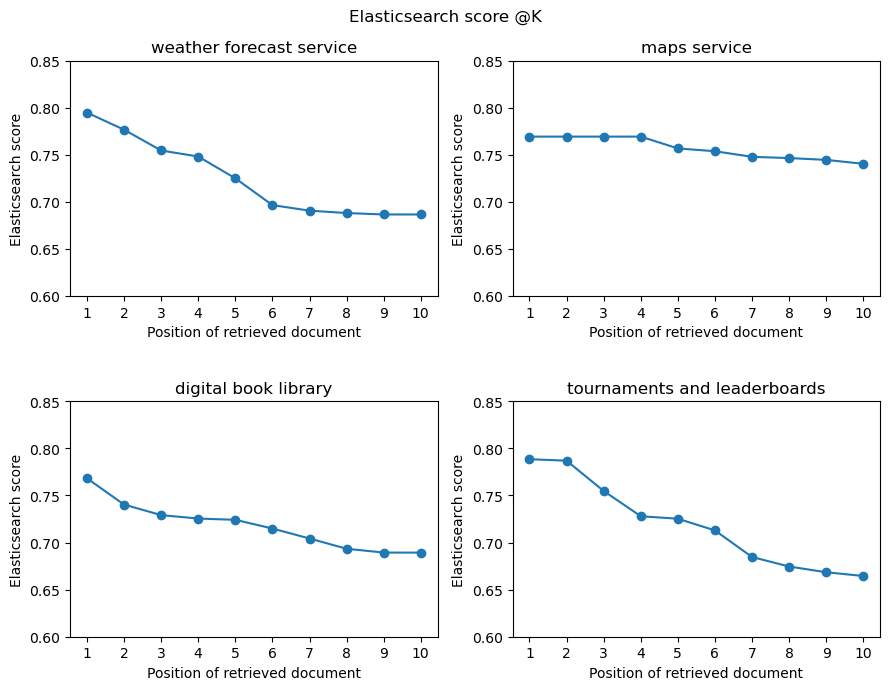

In [269]:
display_graph(queries)